In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# pd.set_option('display.max_rows', None)
train = pd.read_csv('application_train.csv')
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
train.shape

(307511, 122)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
train = train.drop_duplicates(subset = ['SK_ID_CURR'], keep = 'last').reset_index(drop = True)

# Handling null values

In [5]:
# pd.set_option('display.max_rows', None)
info = pd.DataFrame(train.dtypes, columns=['Dtypes'])
info['Unique'] = train.nunique().values
info['NA'] = train.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_CURR,int64,307511,0
TARGET,int64,2,0
NAME_CONTRACT_TYPE,object,2,0
CODE_GENDER,object,3,0
FLAG_OWN_CAR,object,2,0
...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64,9,41519
AMT_REQ_CREDIT_BUREAU_WEEK,float64,9,41519
AMT_REQ_CREDIT_BUREAU_MON,float64,24,41519
AMT_REQ_CREDIT_BUREAU_QRT,float64,11,41519


In [6]:
# Below code gives percentage of null in every column
na_percentage = (train.isna().sum()/train.shape[0])*100

# Below code gives list of columns having more than 60% null
col_to_drop = na_percentage[na_percentage>60].keys()
print(col_to_drop)

train = train.drop(col_to_drop, axis=1)

Index(['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'FONDKAPREMONT_MODE'],
      dtype='object')


In [7]:
train.dropna(how='any', inplace=True)

In [8]:
# pd.set_option('display.max_rows', None)
info = pd.DataFrame(train.dtypes, columns=['Dtypes'])
info['Unique'] = train.nunique().values
info['NA'] = train.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_CURR,int64,31365,0
TARGET,int64,2,0
NAME_CONTRACT_TYPE,object,2,0
CODE_GENDER,object,2,0
FLAG_OWN_CAR,object,2,0
...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64,7,0
AMT_REQ_CREDIT_BUREAU_WEEK,float64,8,0
AMT_REQ_CREDIT_BUREAU_MON,float64,19,0
AMT_REQ_CREDIT_BUREAU_QRT,float64,8,0


C:\Users\agivc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-9-c9bf4cc89fda>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, sharex = False, sharey = False, figsize = (10, 5))


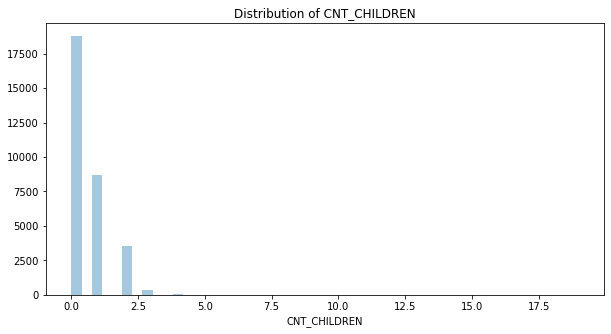

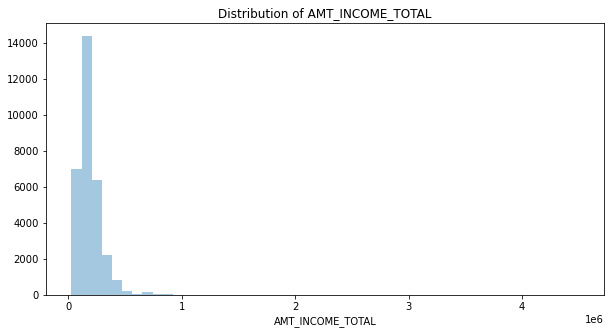

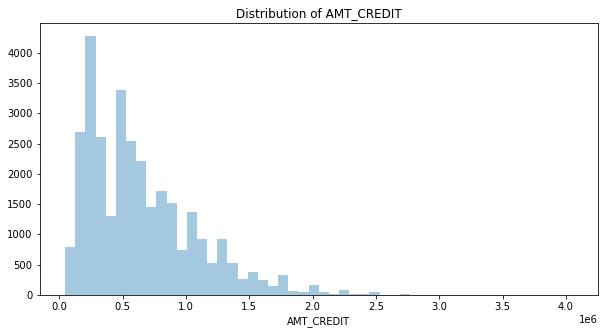

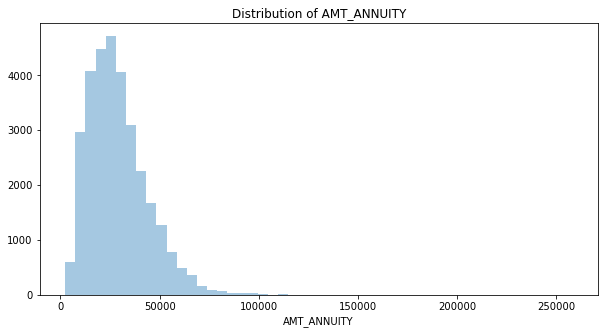

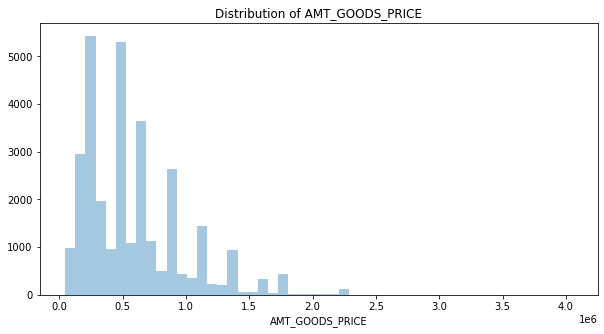

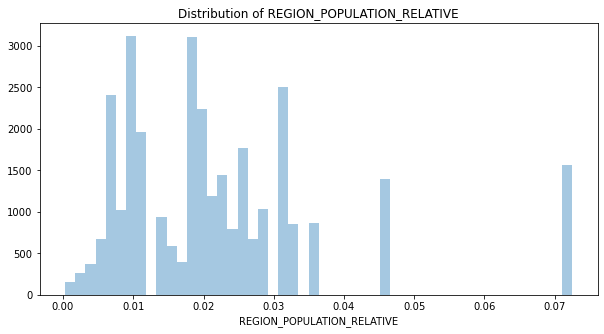

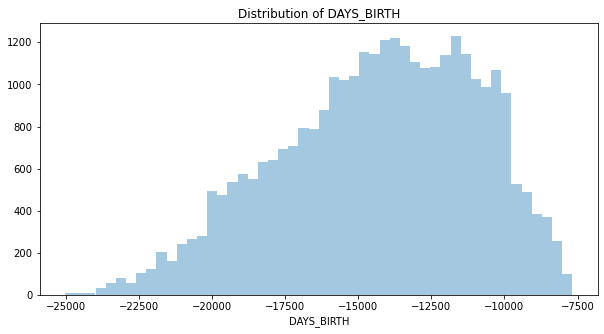

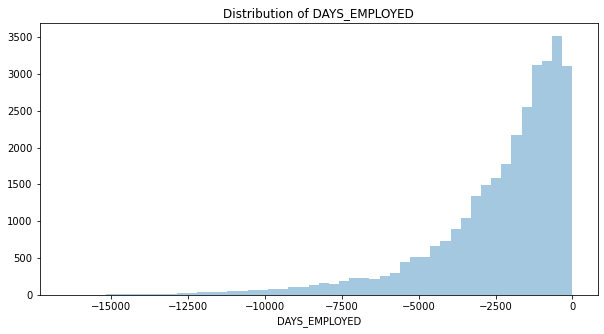

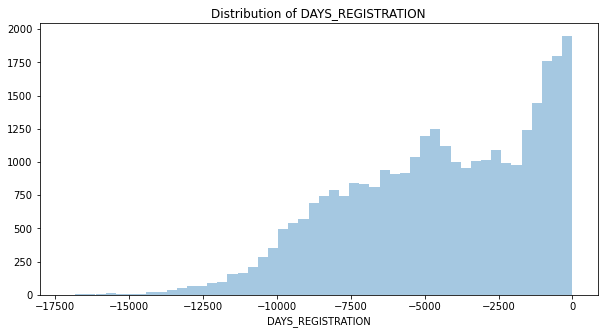

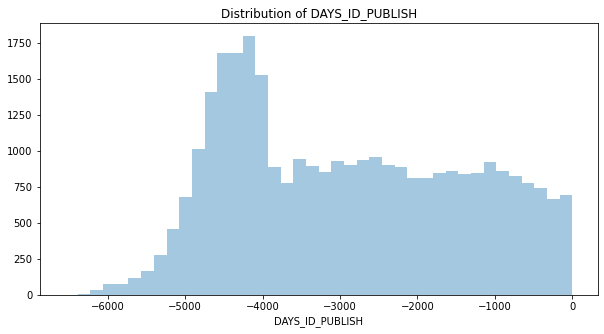

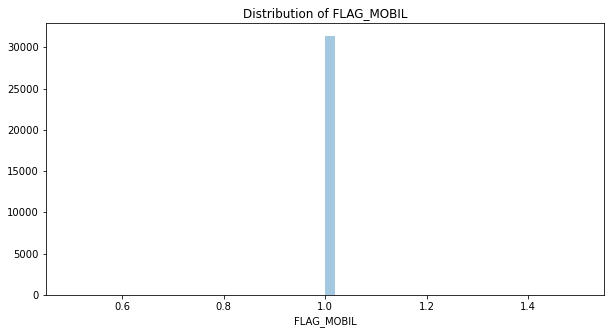

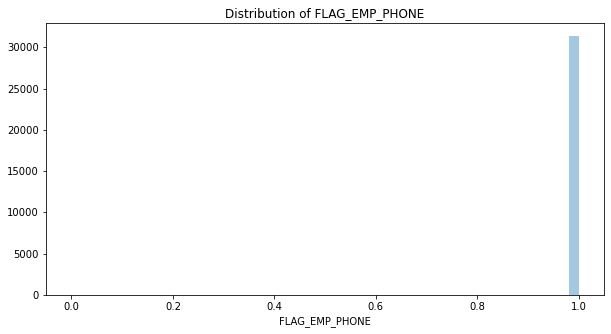

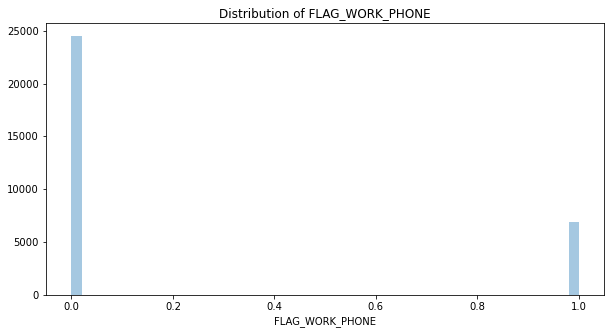

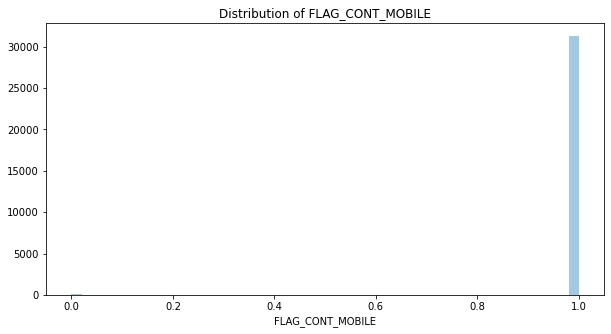

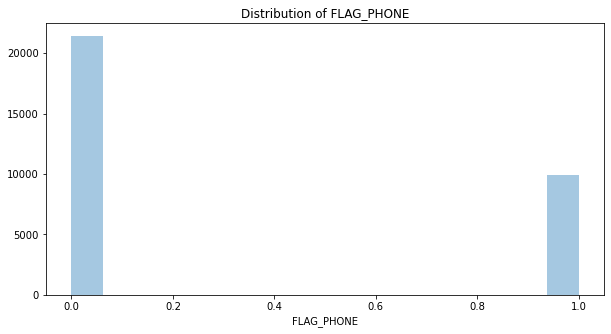

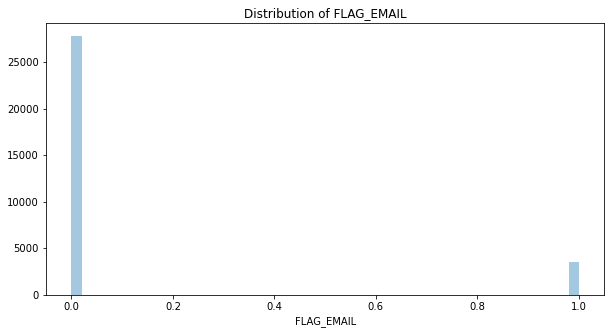

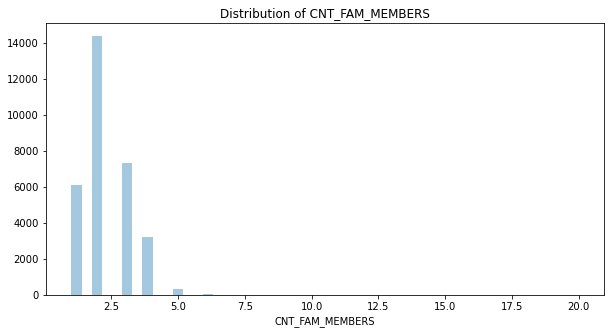

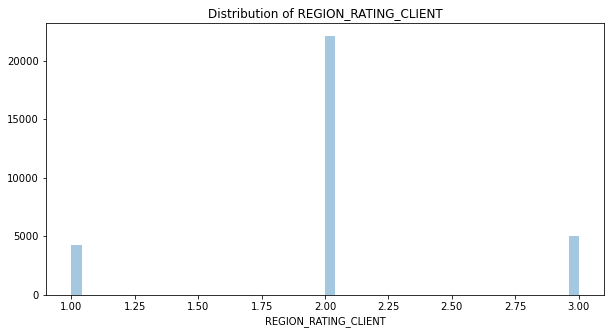

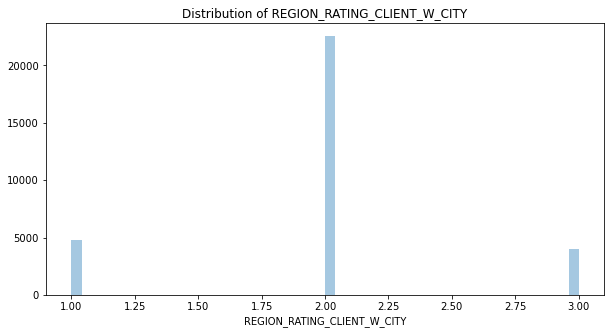

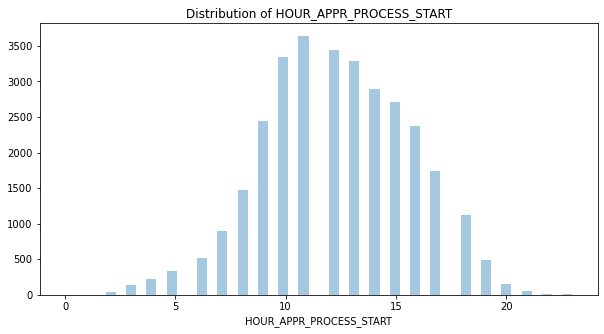

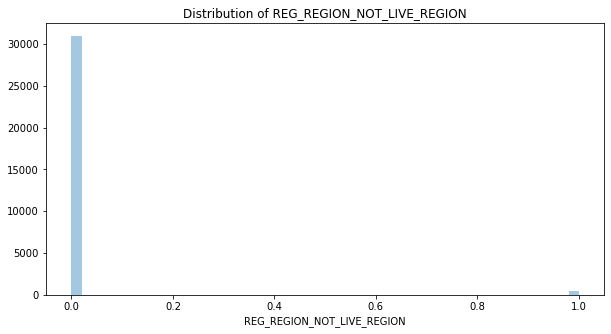

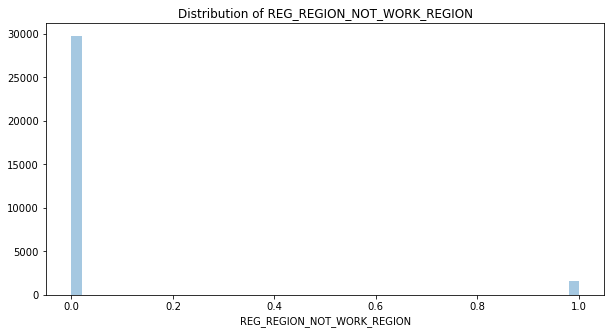

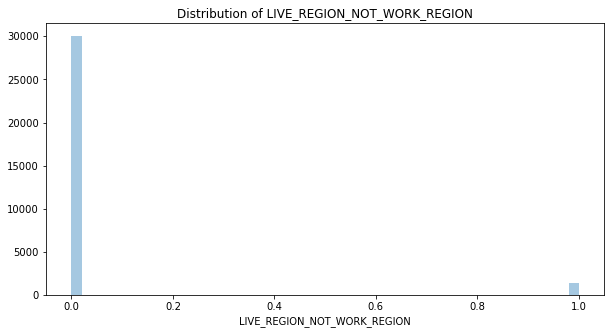

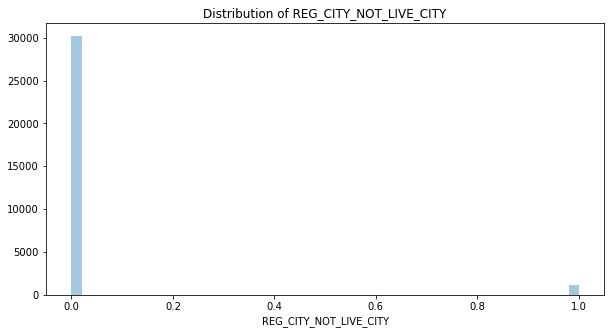

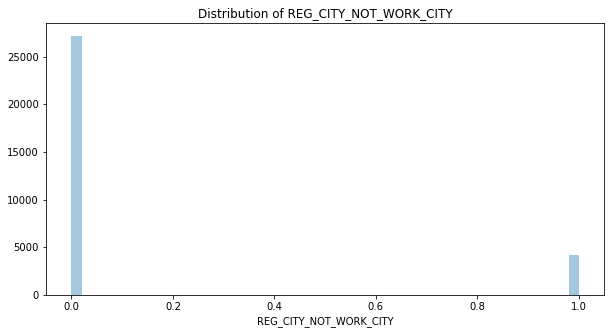

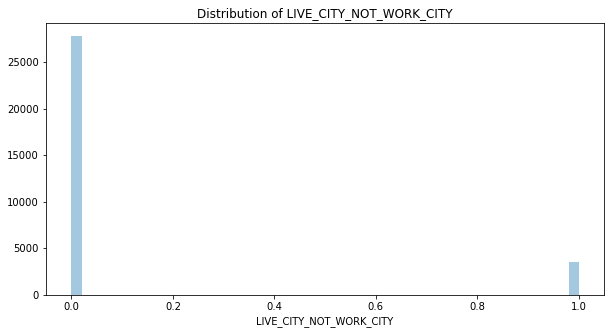

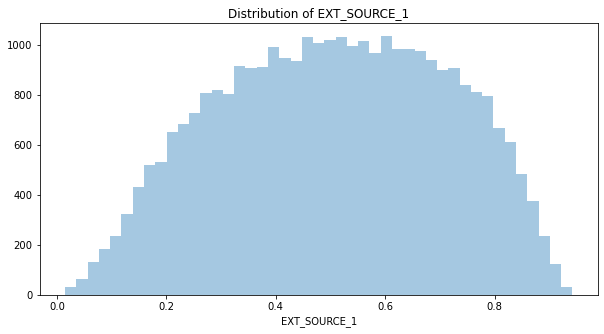

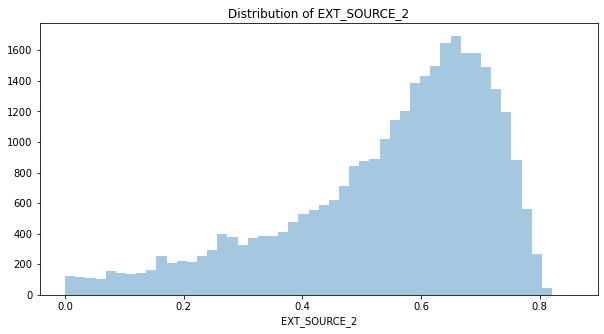

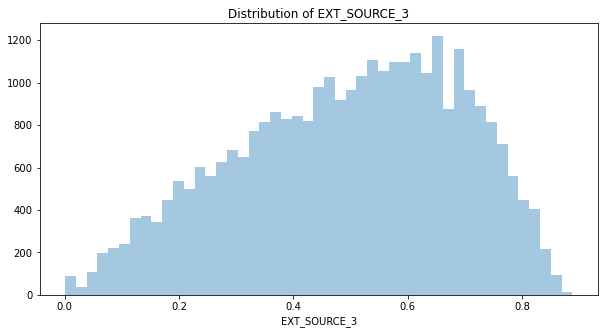

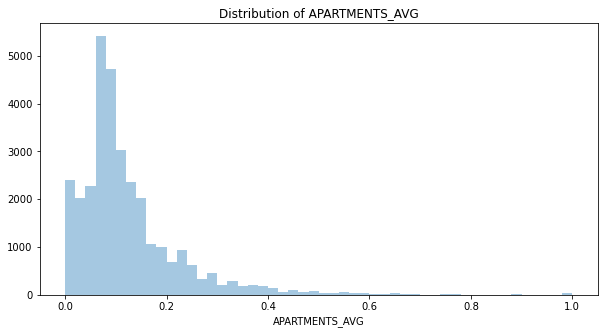

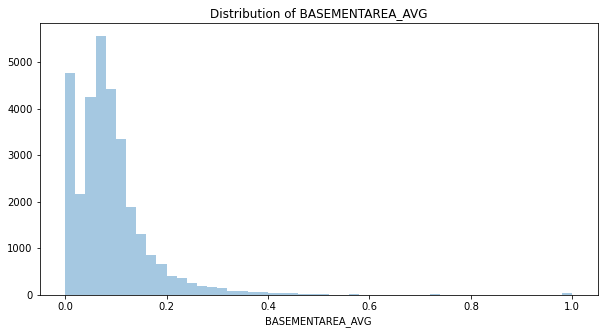

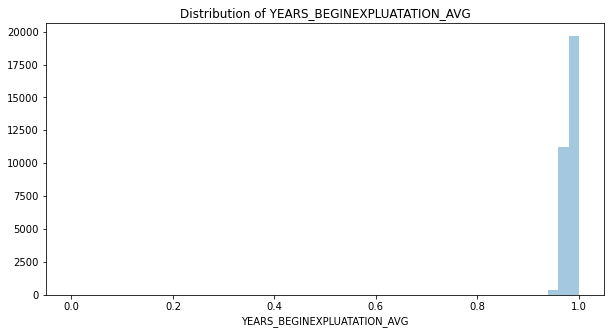

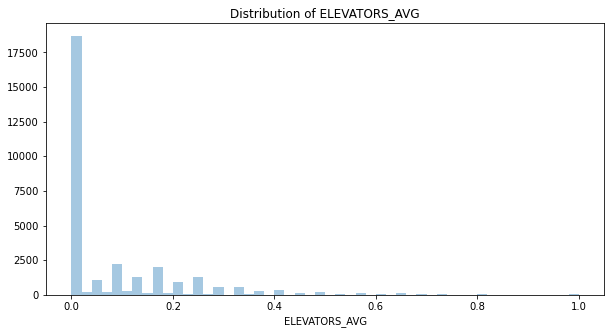

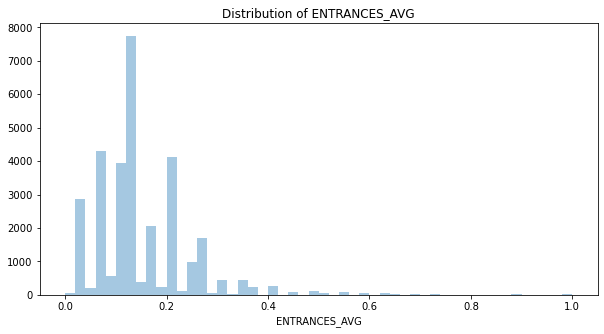

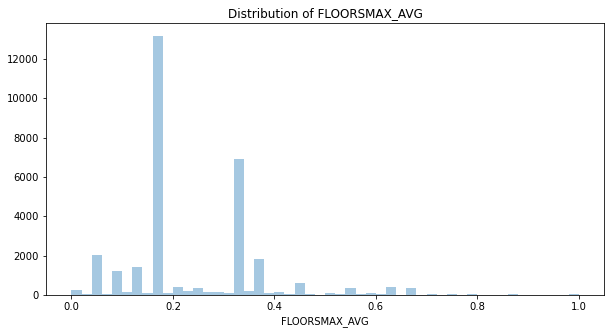

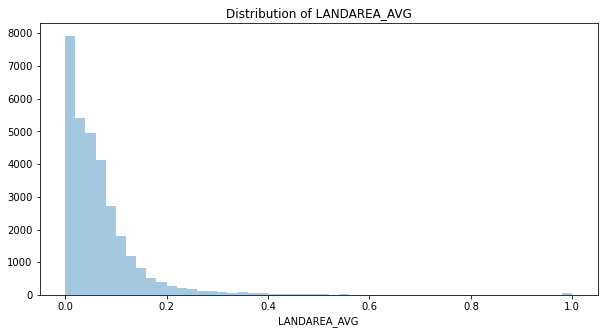

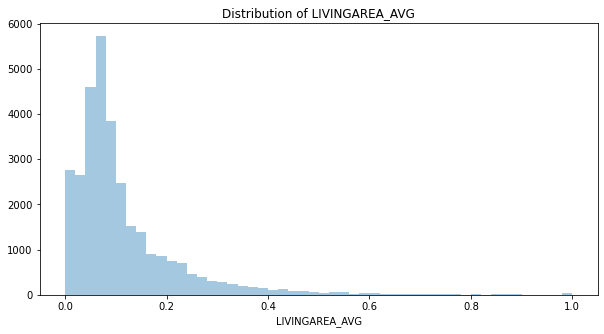

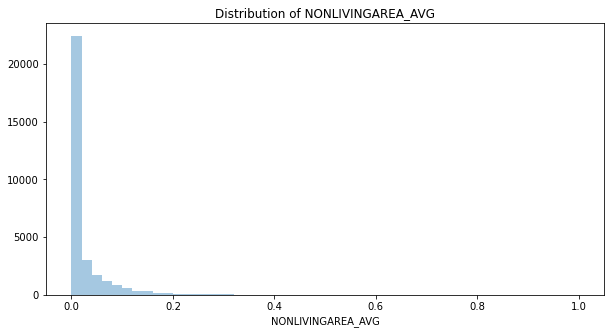

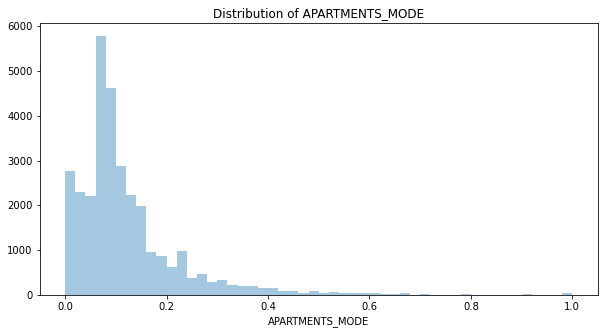

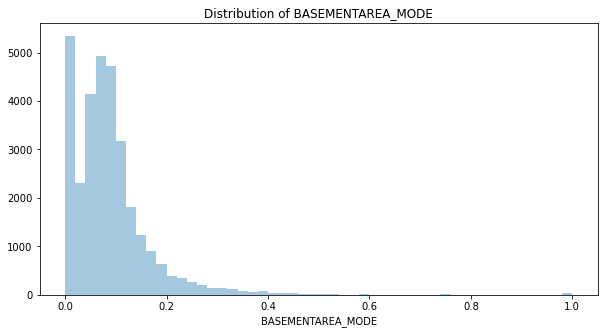

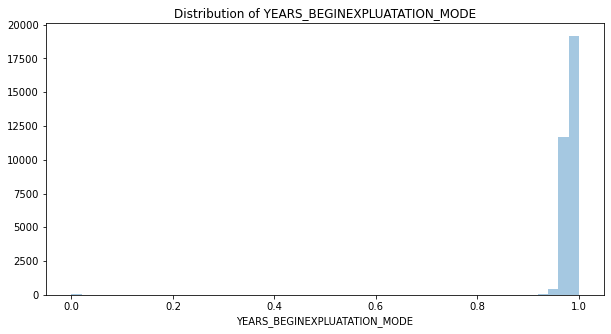

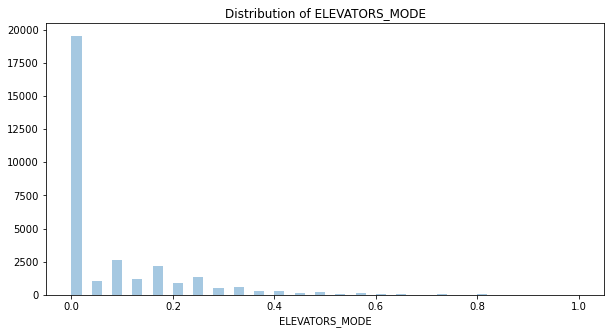

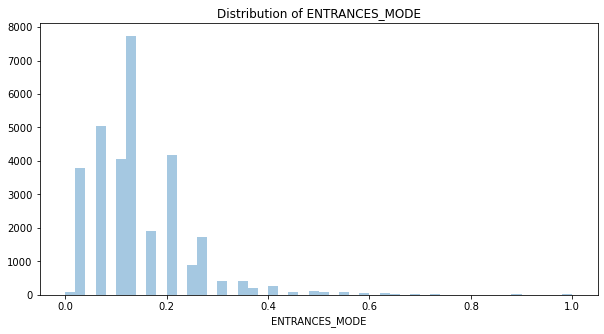

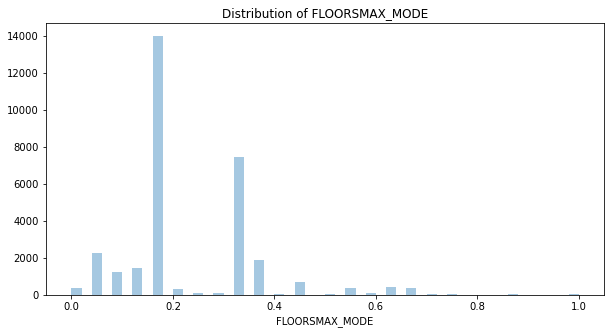

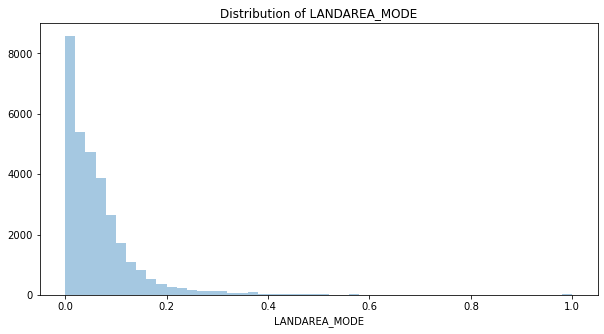

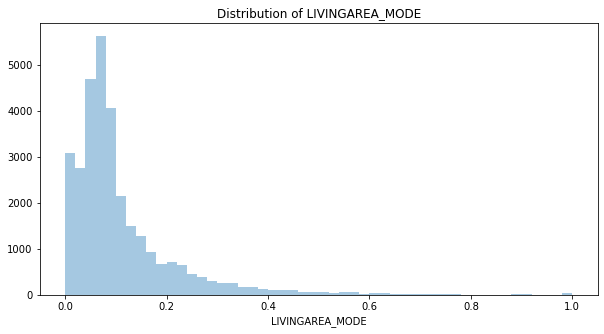

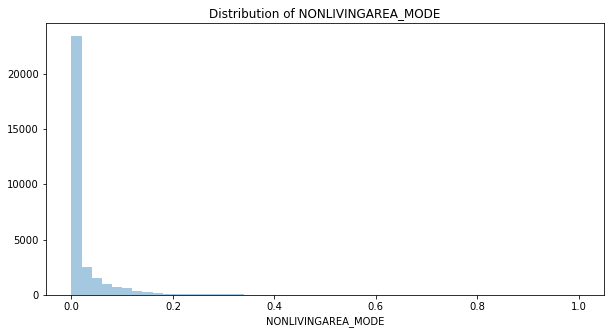

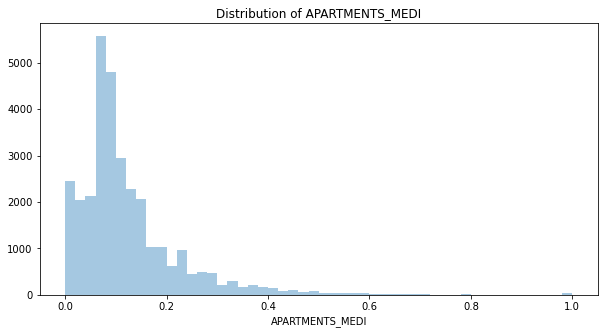

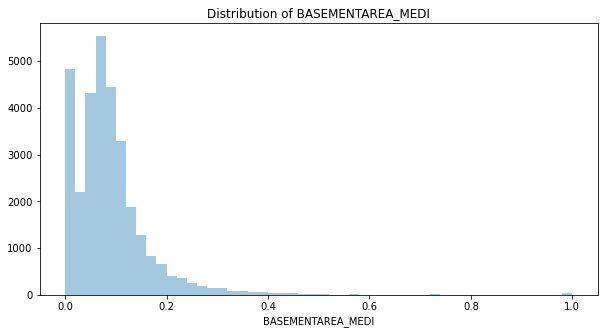

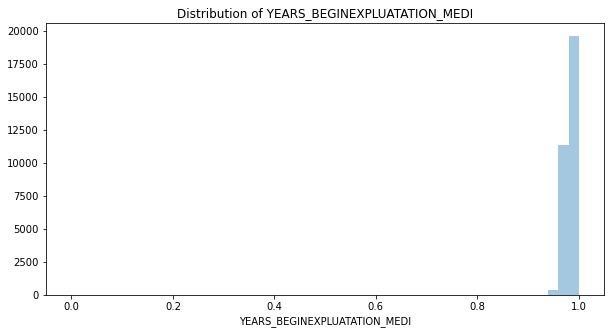

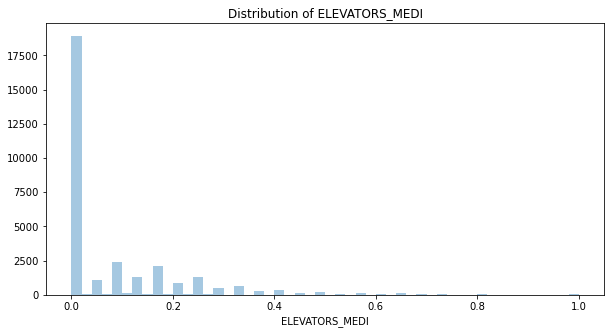

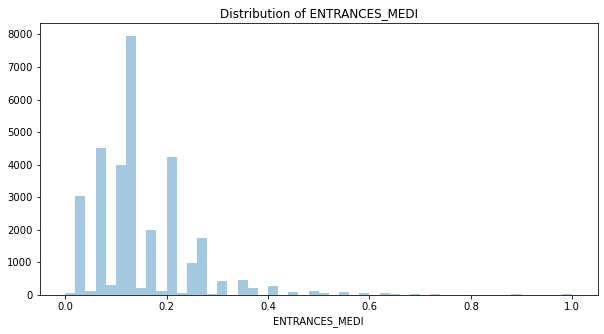

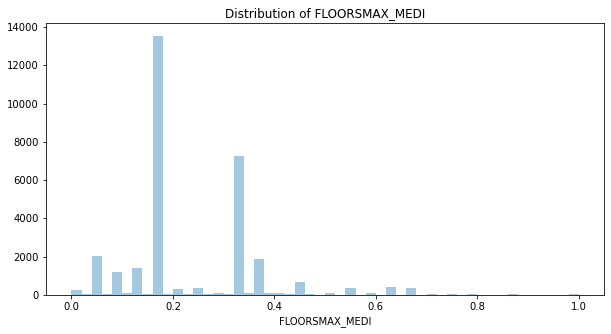

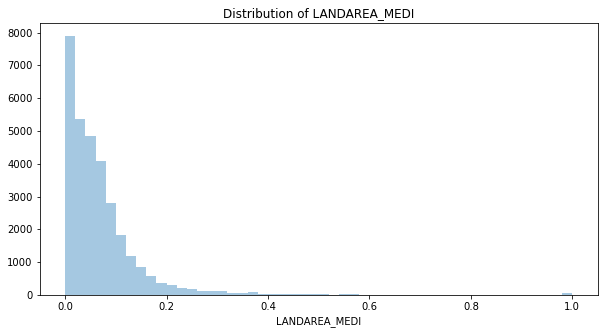

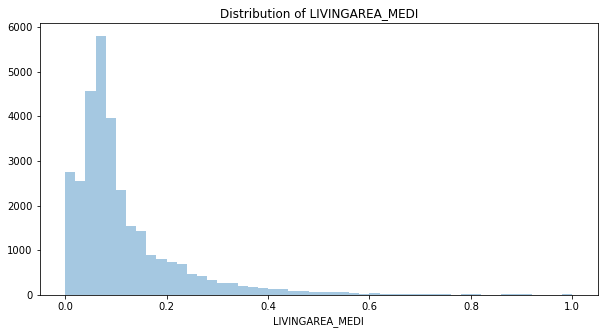

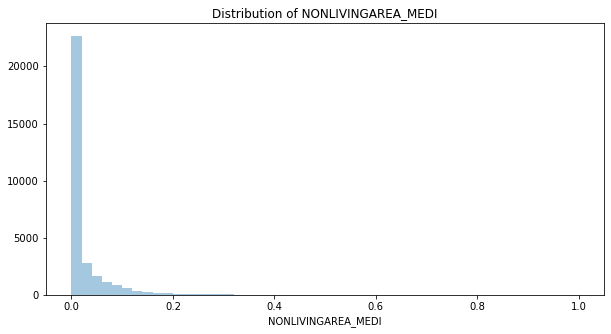

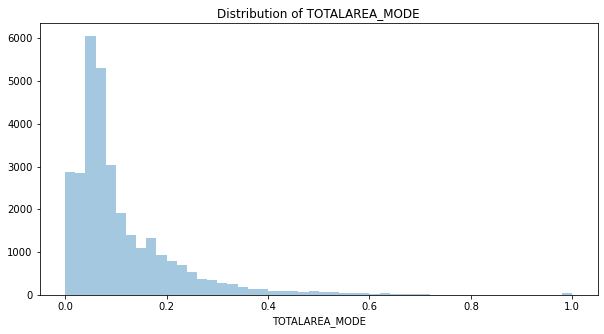

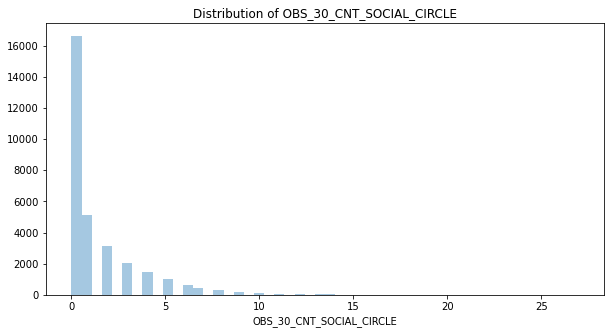

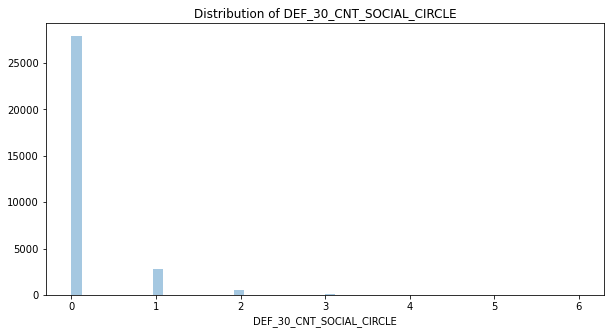

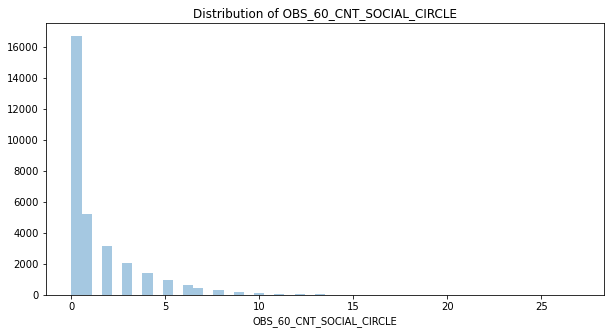

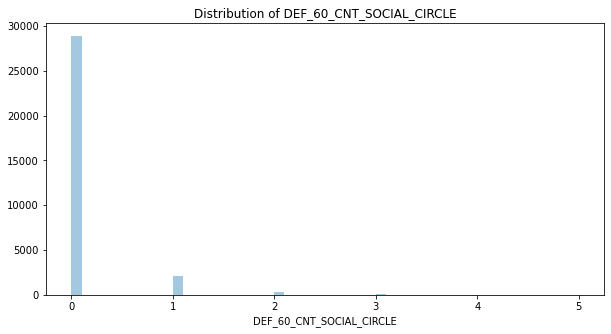

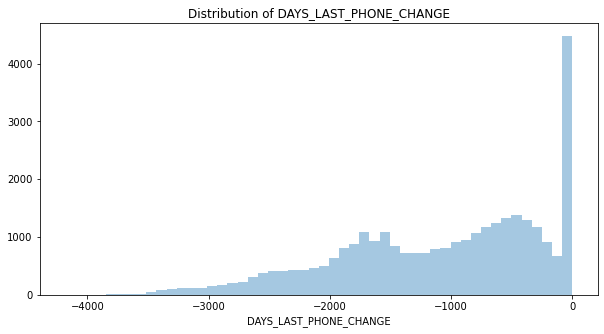

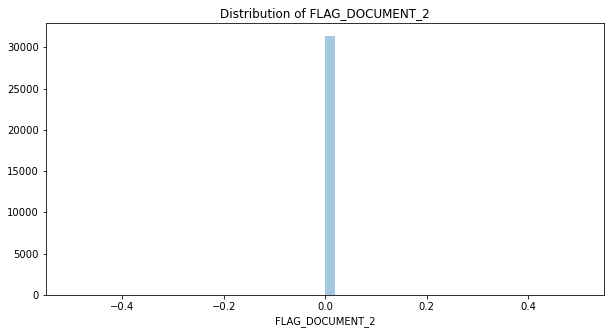

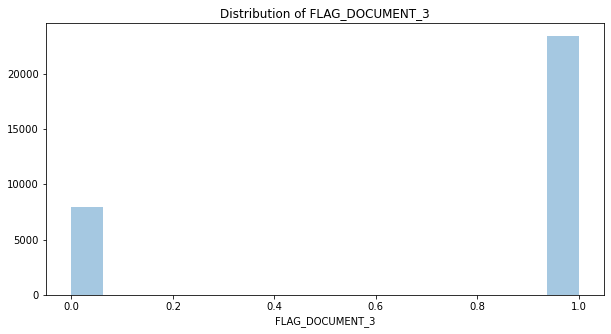

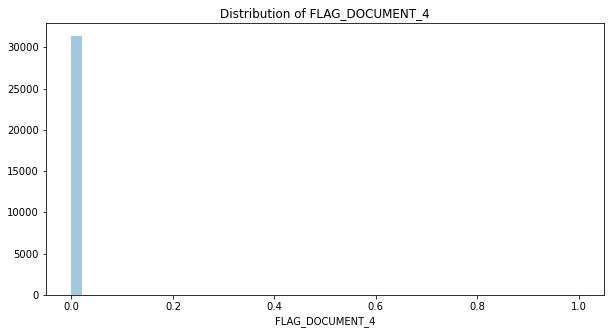

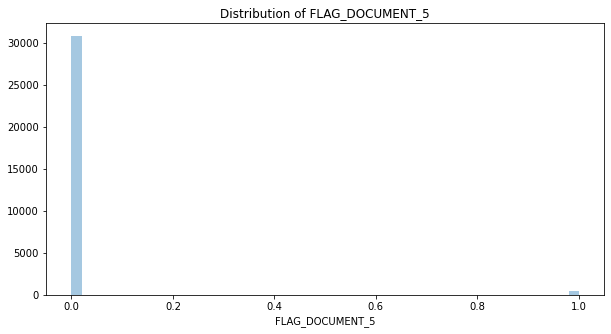

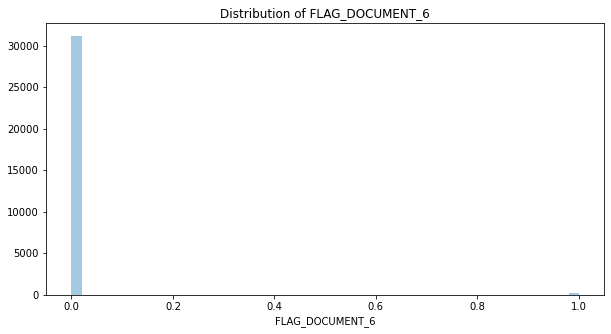

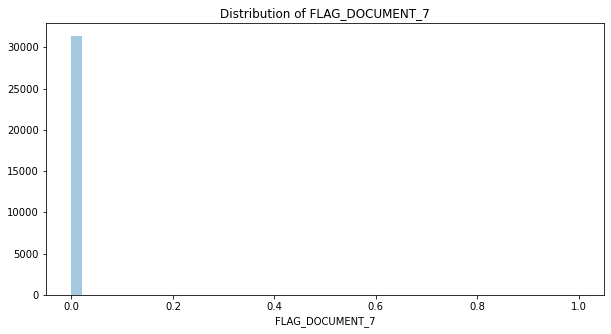

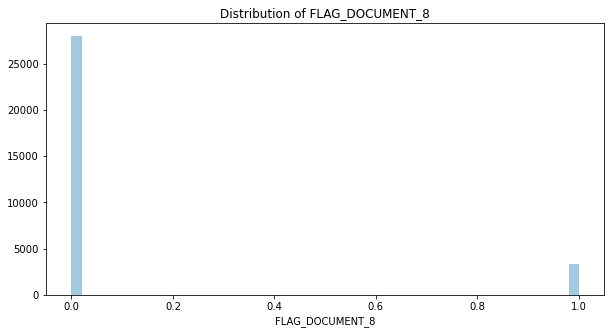

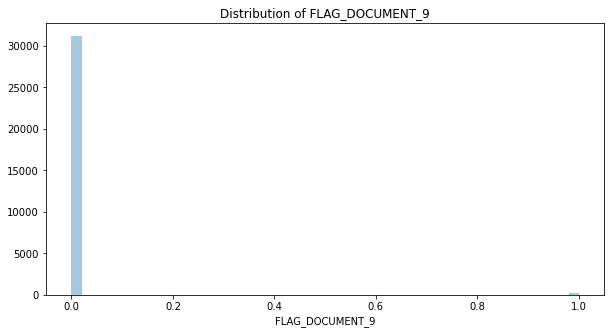

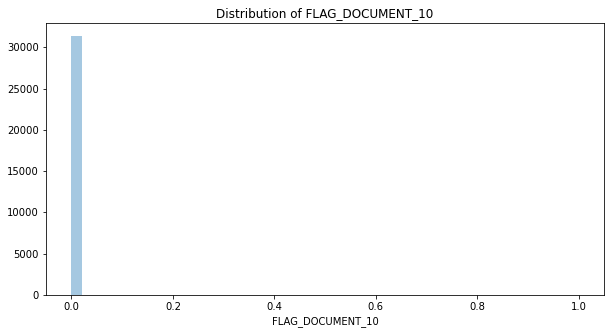

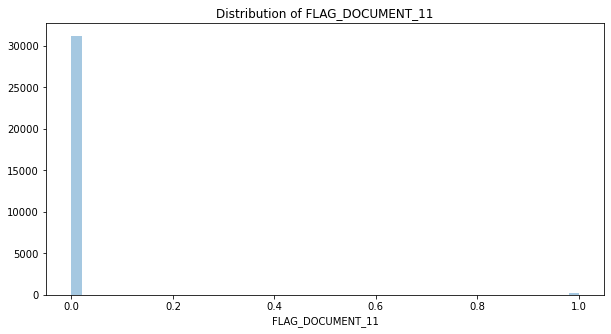

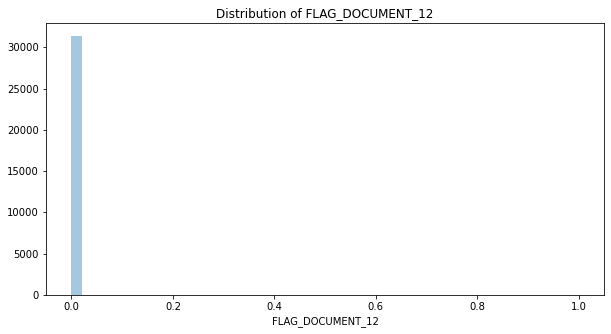

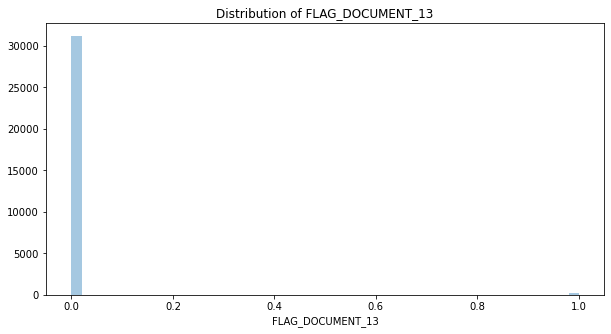

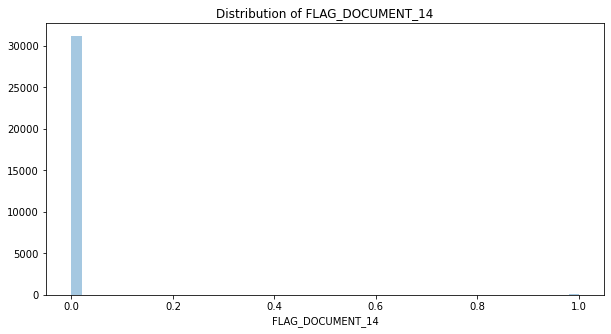

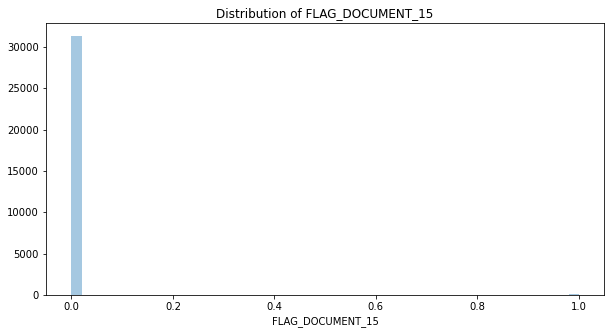

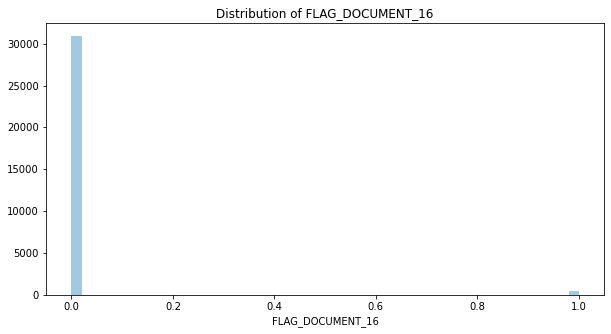

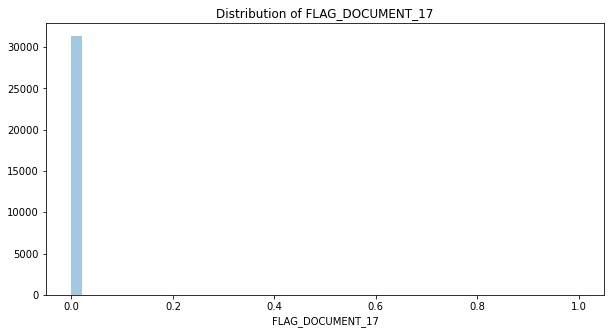

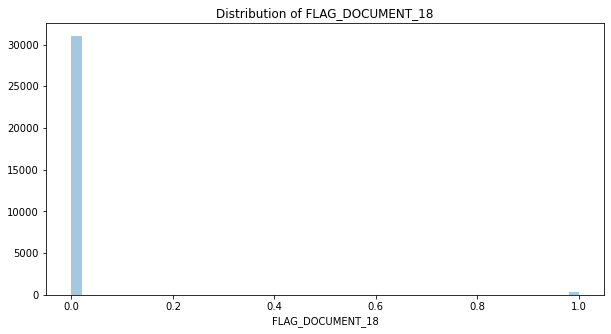

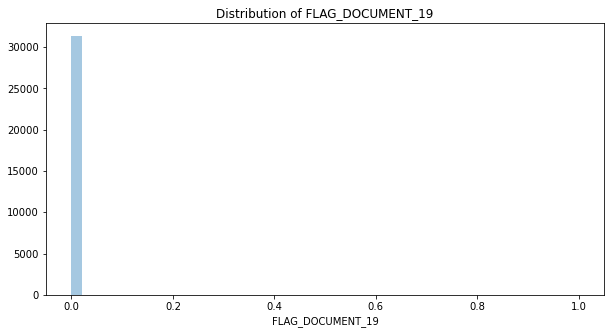

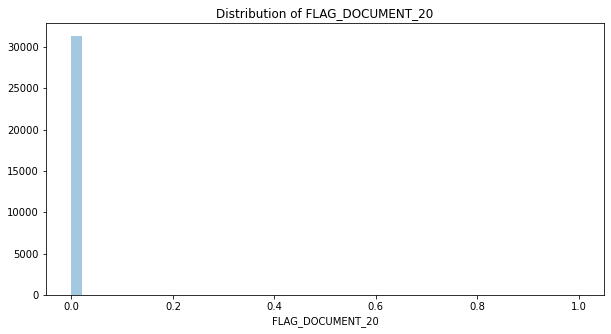

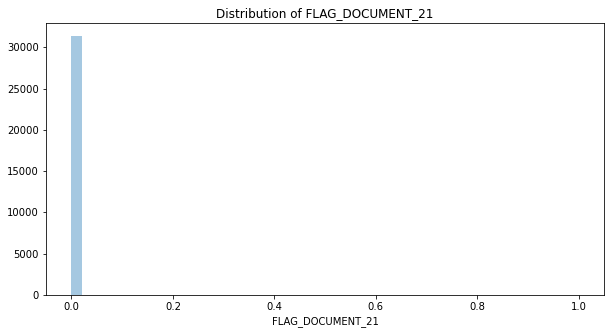

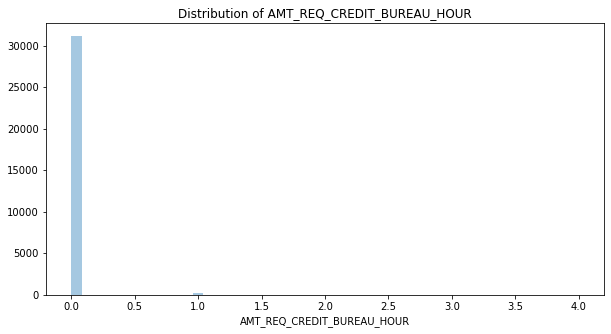

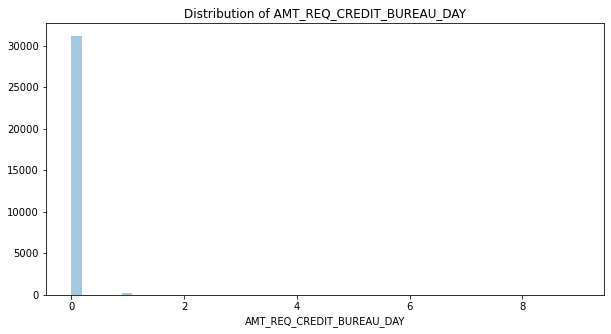

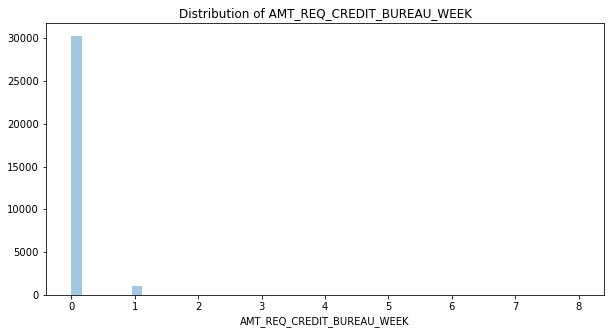

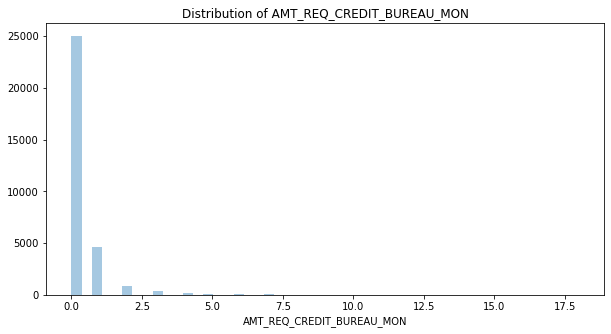

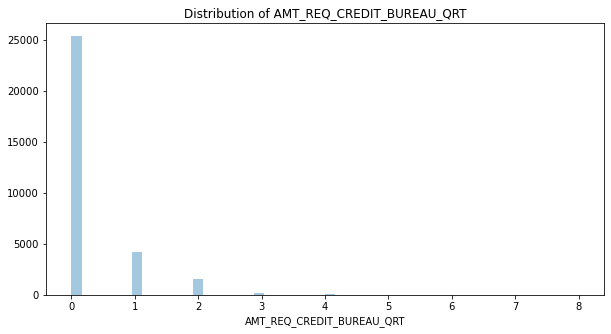

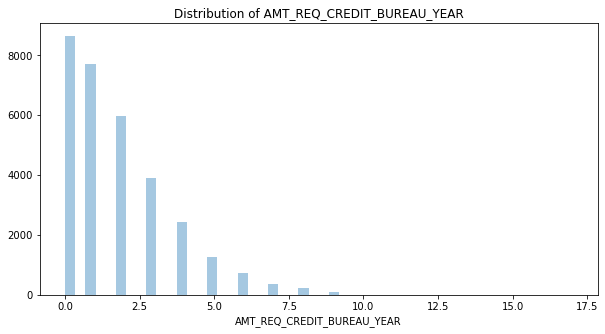

In [9]:
numeric_col = train.select_dtypes(exclude='object').columns.to_list()
for feature in numeric_col[2:]:
    fig, ax = plt.subplots(1, 1, sharex = False, sharey = False, figsize = (10, 5))
    sns.distplot(train[feature], kde= False)
    ax.set_title("Distribution of " + feature)

In [12]:
pd.set_option('display.max_columns', None)
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,31365.000000,31365.000000,31365.000000,3.136500e+04,3.136500e+04,31365.000000,3.136500e+04,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.0,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.00000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.0,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000,31365.000000
mean,278074.387980,0.066220,0.540603,1.930092e+05,6.469350e+05,29134.495696,5.835564e+05,0.022289,-14313.856369,-2384.260896,-4527.354663,-2908.662968,1.0,0.999904,0.219066,0.997386,0.316754,0.114044,2.279930,2.022956,1.976279,12.336235,0.013295,0.050980,0.042436,0.037143,0.133557,0.114236,0.505435,0.547354,0.494952,0.124435,0.089423,0.981620,0.079166,0.154145,0.237510,0.067935,0.114905,0.027221,0.120658,0.088204,0.980927,0.07418,0.148961,0.232936,0.066462,0.112771,0.025562,0.124855,0.088814,0.981620,0.078283,0.153546,0.237151,0.068834,0.116190,0.027088,0.111870,1.396748,0.135948,1.381572,0.093576,-1079.680121,0.0,0.746692,0.000064,0.016643,0.006759,0.000159,0.107030,0.005579,0.000032,0.005579,0.000064,0.005452,0.005197,0.001530,0.014570,0.000542,0.011000,0.000638,0.001084,0.000255,0.007524,0.007779,0.037590,0.340634,0.262139,1.822509
std,103105.211978,0.248671,0.757220,1.155417e+05,4.345563e+05,15481.234401,3.999204e+05,0.015391,3370.960380,2268.301416,3212.215851,1516.606142,0.0,0.009780,0.413620,0.051065,0.465218,0.317870,0.942388,0.543112,0.529284,3.334353,0.114537,0.219961,0.201585,0.189116,0.340181,0.318102,0.205997,0.175073,0.194224,0.108965,0.083229,0.020447,0.134377,0.101124,0.1407

# Handle Anomalies Numerical Types

In [13]:
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])

In [14]:
train['DAYS_EMPLOYED'] = abs(train['DAYS_EMPLOYED'])

In [15]:
train['DAYS_REGISTRATION'] = abs(train['DAYS_REGISTRATION'])

In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,31365.0,278074.387980,103105.211978,100002.0,188398.0,278631.0,368608.0,456226.0
TARGET,31365.0,0.066220,0.248671,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,31365.0,0.540603,0.757220,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,31365.0,193009.180244,115541.715458,27000.0,126000.0,171000.0,225000.0,4500000.0
AMT_CREDIT,31365.0,646934.983644,434556.263892,45000.0,288873.0,541323.0,900000.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,31365.0,0.007779,0.126021,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,31365.0,0.037590,0.211779,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,31365.0,0.340634,1.040818,0.0,0.0,0.0,0.0,18.0
AMT_REQ_CREDIT_BUREAU_QRT,31365.0,0.262139,0.605229,0.0,0.0,0.0,0.0,8.0


# Handle Anomalies Object (Categorical) Types

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


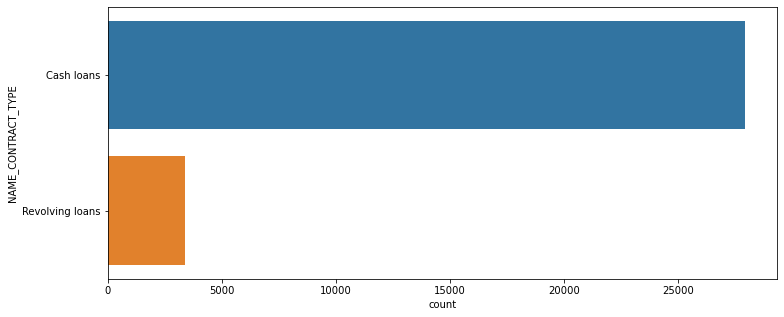

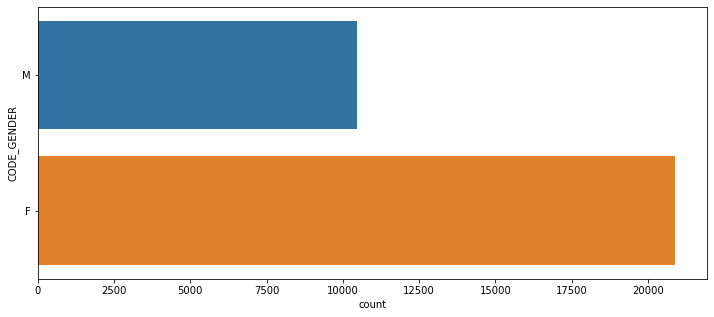

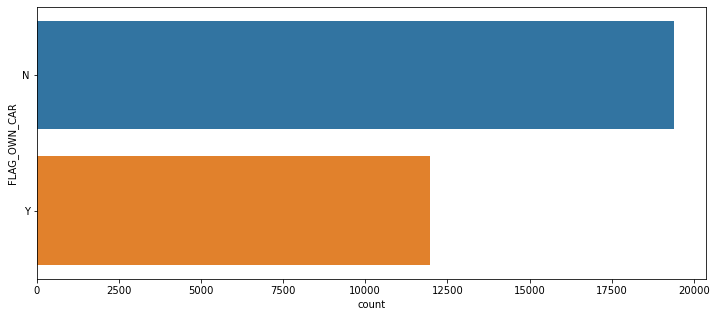

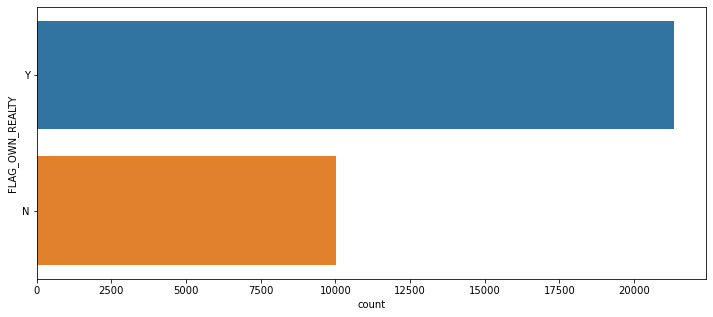

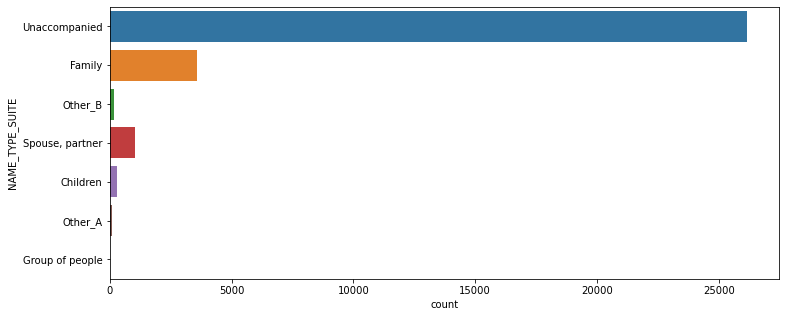

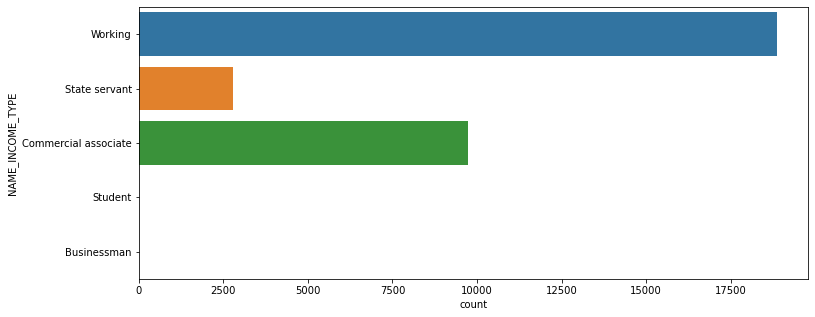

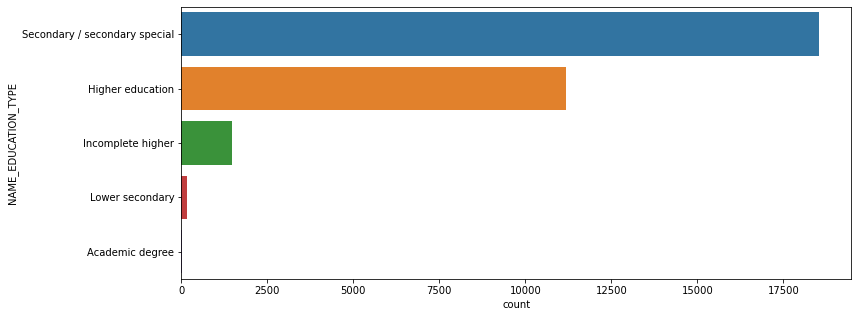

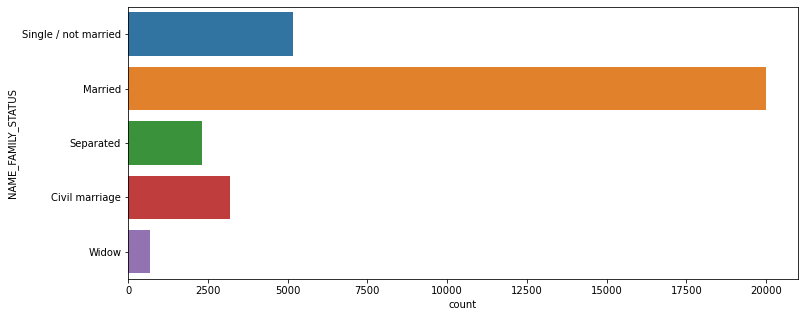

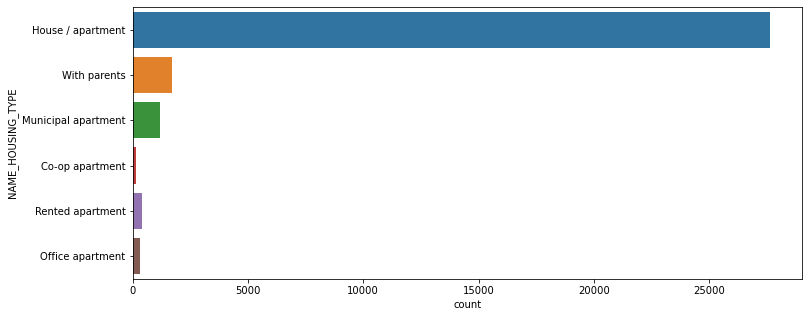

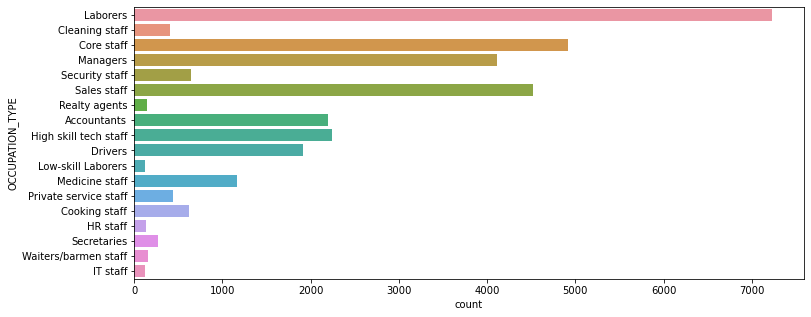

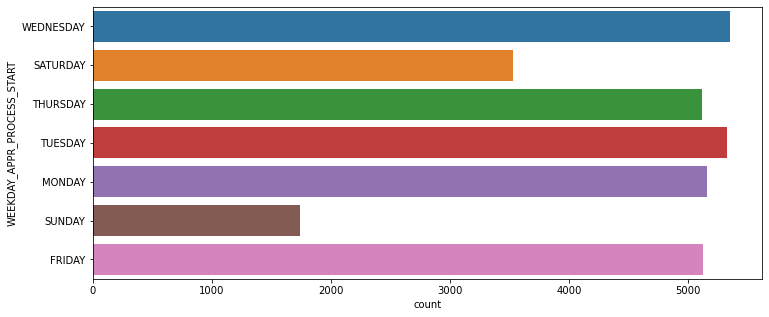

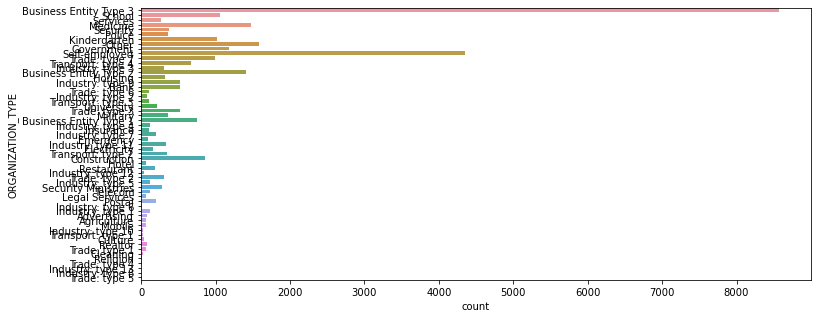

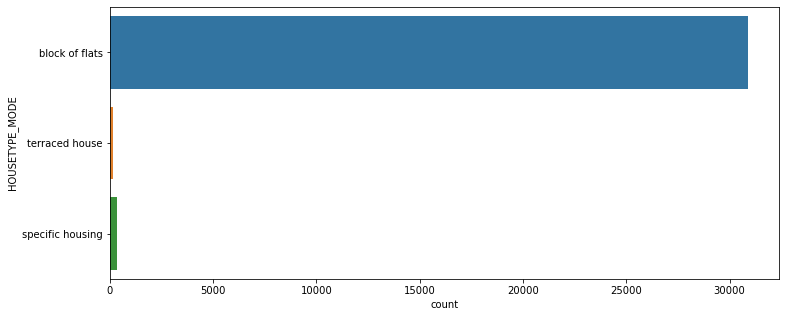

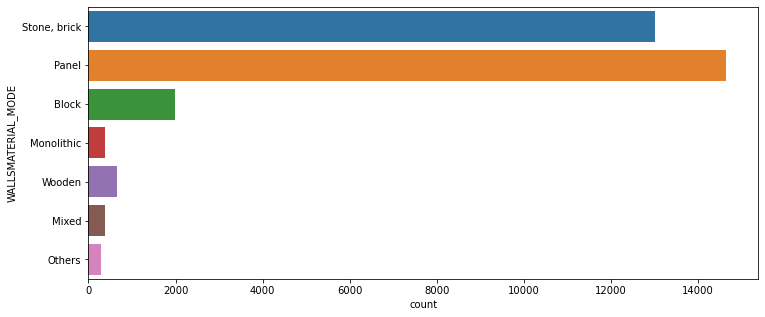

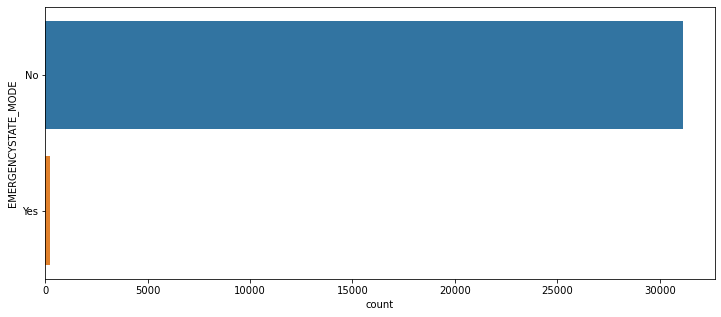

In [17]:
obj_col = train.select_dtypes(['object']).columns.to_list()
print(obj_col)
for feature in obj_col:
    plt.figure(figsize=(12,5))
    sns.countplot(y = train[feature])

In [18]:
# pd.set_option('display.max_rows', None)
info = pd.DataFrame(train.dtypes, columns=['Dtypes'])
info['Unique'] = train.nunique().values
info['NA'] = train.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_CURR,int64,31365,0
TARGET,int64,2,0
NAME_CONTRACT_TYPE,object,2,0
CODE_GENDER,object,2,0
FLAG_OWN_CAR,object,2,0
...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64,7,0
AMT_REQ_CREDIT_BUREAU_WEEK,float64,8,0
AMT_REQ_CREDIT_BUREAU_MON,float64,19,0
AMT_REQ_CREDIT_BUREAU_QRT,float64,8,0


In [19]:
# pd.set_option('display.max_columns', None)
prevpos = pd.read_csv('prev_poscash.csv')

bureau  = pd.read_csv('merge_bureau.csv')

In [20]:
train1 = train.merge(bureau, how = "inner", on = "SK_ID_CURR")


In [21]:
train1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_SUM,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Closed,currency 1,-1437,-1072.0,-1185.0,135000.0,Consumer credit,-1185,-47,X
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0.0252,0.0383,0.9722,0.0000,0.0690,0.0833,0.0377,0.0198,0.0000,0.0250,0.0369,0.9722,0.00,0.0690,0.0833,0.0375,0.0193,0.0000,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Closed,currency 1,-645,85.0,-36.0,120735.0,Consumer credit,-34,-21,0
2,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.026392,18632,6977,3904.0,-1937,1,1,0,1,1,0,Managers,3.0,2,2,TUESDAY,10,0,0,0,0,0,0,Services,0.311510,0.713355,0.309275,0.5309,0.2491,0.9811,0.88,0.3793,0.4583,0.3977,0.5878,0.0487,0.5410,0.2585,0.9811,0.8862,0.3793,0.4583,0.4067,0.6124,0.0516,0.5361,0.2491,0.9811,0.88,0.3793,0.4583,0.4046,0.5983,0.0498,block of flats,0.5149,Panel,No,2.0,0.0,2.0,0.0,-1285.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,3.0,Closed,currency 1,-764,-522.0,-610.0,87

In [22]:
# pd.set_option('display.max_rows', None)
info = pd.DataFrame(train1.dtypes, columns=['Dtypes'])
info['Unique'] = train1.nunique().values
info['NA'] = train1.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_CURR,int64,9290,0
TARGET,int64,2,0
NAME_CONTRACT_TYPE,object,2,0
CODE_GENDER,object,2,0
FLAG_OWN_CAR,object,2,0
...,...,...,...
AMT_CREDIT_SUM,float64,13267,0
CREDIT_TYPE,object,9,0
DAYS_CREDIT_UPDATE,int64,2592,0
MONTHS_BALANCE,int64,97,0


In [23]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 0 to 26999
Columns: 115 entries, SK_ID_CURR to STATUS
dtypes: float64(52), int64(44), object(19)
memory usage: 23.9+ MB


In [24]:
train2 = train1.merge(prevpos, how = 'inner', on = 'SK_ID_CURR')

In [25]:
train2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LANDAREA_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_SUM,CREDIT_TYPE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE_x,STATUS,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_CREDIT_y,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START_y,RATE_DOWN_PAYMENT,DAYS_DECISION,NAME_TYPE_SUITE_y,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,PRODUCT_COMBINATION,NFLAG_INSURED_ON_APPROVAL,MONTHS_BALANCE_y,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS
0,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.026392,18632,6977,3904.0,-1937,1,1,0,1,1,0,Managers,3.0,2,2,TUESDAY,10,0,0,0,0,0,0,Services,0.311510,0.713355,0.309275,0.5309,0.2491,0.9811,0.88,0.3793,0.4583,0.3977,0.5878,0.0487,0.5410,0.2585,0.9811,0.8862,0.3793,0.4583,0.4067,0.6124,0.0516,0.5361,0.2491,0.9811,0.88,0.3793,0.4583,0.4046,0.5983,0.0498,block of flats,0.5149,Panel,No,2.0,0.0,2.0,0.0,-1285.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,3.0,Closed,currency 1,-764,-522.0,-610.0,87066.00,Consumer credit,-608,-25,0,Consumer loans,9917.010,44631.0,4962.825,MONDAY,0.108985,-2808,Family,POS,Country-wide,5.0,POS household without interest,0.0,-92,2.0,2.0,ApprovedActive
1,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.026392,18632,6977,3904.0,-1937,1,1,0,1,1,0,Managers,3.0,2,2,TUESDAY,10,0,0,0,0,0,0,Services,0.311510,0.713355,0.309275,0.5309,0.2491,0.9811,0.88,0.3793,0.4583,0.3977,0.5878,0.0487,0.5410,0.2585,0.9811,0.8862,0.3793,0.4583,0.4067,0.6124,0.0516,0.5361,0.2491,0.9811,0.88,0.3793,0.4583,0.4046,0.5983,0.0498,block of flats,0.5149,Panel,No,2.0,0.0,2.0,0.0,-1285.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,3.0,Closed,currency 1,-194,-102.0,-102.0,75872.70,Consumer credit,-100,-6,0,Consumer loans,9917.010,44631.0,4962.825,MONDAY,0.108985,-2808,Family,POS,Country-wide,5.0,POS household without interest,0.0,-92,2.0,2.0,ApprovedActive
2,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,6

In [26]:
# pd.set_option('display.max_columns', None)
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40755 entries, 0 to 40754
Columns: 132 entries, SK_ID_CURR to NAME_CONTRACT_STATUS
dtypes: float64(60), int64(46), object(26)
memory usage: 41.4+ MB


In [27]:
train2['NAME_CONTRACT_TYPE'] = train2[['NAME_CONTRACT_TYPE_x','NAME_CONTRACT_TYPE_y']].sum(axis=1)
train2.drop(['NAME_CONTRACT_TYPE_x','NAME_CONTRACT_TYPE_y'],axis=1, inplace=True)

In [28]:
train2['WEEKDAY_APPR_PROCESS_START'] = train2[['WEEKDAY_APPR_PROCESS_START_x','WEEKDAY_APPR_PROCESS_START_y']].sum(axis=1)
train2.drop(['WEEKDAY_APPR_PROCESS_START_x','WEEKDAY_APPR_PROCESS_START_y'],axis=1, inplace=True)

In [29]:
train2['AMT_ANNUITY'] = train2[['AMT_ANNUITY_x','AMT_ANNUITY_y']].sum(axis=1)
train2.drop(['AMT_ANNUITY_x','AMT_ANNUITY_y'],axis=1, inplace=True)

In [30]:
train2['NAME_TYPE_SUITE'] = train2[['NAME_TYPE_SUITE_x','NAME_TYPE_SUITE_y']].sum(axis=1)
train2.drop(['NAME_TYPE_SUITE_x','NAME_TYPE_SUITE_y'],axis=1, inplace=True)

In [31]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40755 entries, 0 to 40754
Columns: 128 entries, SK_ID_CURR to NAME_TYPE_SUITE
dtypes: float64(59), int64(46), object(23)
memory usage: 40.1+ MB


In [32]:
pd.set_option('display.max_rows', None)
info = pd.DataFrame(train2.dtypes, columns=['Dtypes'])
info['Unique'] = train2.nunique().values
info['NA'] = train2.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_CURR,int64,6662,0
TARGET,int64,2,0
CODE_GENDER,object,2,0
FLAG_OWN_CAR,object,2,0
FLAG_OWN_REALTY,object,2,0
CNT_CHILDREN,int64,6,0
AMT_INCOME_TOTAL,float64,166,0
AMT_CREDIT_x,float64,1664,0
AMT_GOODS_PRICE,float64,338,0
NAME_INCOME_TYPE,object,4,0


In [33]:
train2.to_csv('app_train_final.csv', index=False)

In [34]:
train2.isna().sum()

SK_ID_CURR                      0
TARGET                          0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_GOODS_PRICE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT

In [35]:
# prev = pd.read_csv('new_prev_app.csv')
creins = pd.read_csv('CredInstal.csv')

In [36]:
train3 = train2.merge(creins, how = 'inner', on = 'SK_ID_CURR')

In [37]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10638 entries, 0 to 10637
Columns: 142 entries, SK_ID_CURR to AMT_PAYMENT
dtypes: float64(69), int64(49), object(24)
memory usage: 11.6+ MB


In [38]:
train3['NAME_CONTRACT_STATUS'] = train3[['NAME_CONTRACT_STATUS_x','NAME_CONTRACT_STATUS_y']].sum(axis=1)
train3.drop(['NAME_CONTRACT_STATUS_x','NAME_CONTRACT_STATUS_y'],axis=1, inplace=True)

In [39]:
train3['MONTHS_BALANCE'] = train3[['MONTHS_BALANCE_x','MONTHS_BALANCE_y']].sum(axis=1)
train3.drop(['MONTHS_BALANCE_x','MONTHS_BALANCE_y'],axis=1, inplace=True)

In [40]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10638 entries, 0 to 10637
Columns: 139 entries, SK_ID_CURR to NAME_CONTRACT_STATUS
dtypes: float64(69), int64(47), object(23)
memory usage: 11.4+ MB


In [43]:
# pd.set_option('display.max_rows', None)
info = pd.DataFrame(train3.dtypes, columns=['Dtypes'])
info['Unique'] = train3.nunique().values
info['NA'] = train3.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_CURR,int64,1552,0
TARGET,int64,2,0
CODE_GENDER,object,2,0
FLAG_OWN_CAR,object,2,0
FLAG_OWN_REALTY,object,2,0
CNT_CHILDREN,int64,5,0
AMT_INCOME_TOTAL,float64,96,0
AMT_CREDIT_x,float64,748,0
AMT_GOODS_PRICE,float64,235,0
NAME_INCOME_TYPE,object,3,0


In [41]:
info = pd.DataFrame(train3.dtypes, columns=['Dtypes'])
info['Unique'] = train3.nunique().values
info['NA'] = train3.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_CURR,int64,1552,0
TARGET,int64,2,0
CODE_GENDER,object,2,0
FLAG_OWN_CAR,object,2,0
FLAG_OWN_REALTY,object,2,0
CNT_CHILDREN,int64,5,0
AMT_INCOME_TOTAL,float64,96,0
AMT_CREDIT_x,float64,748,0
AMT_GOODS_PRICE,float64,235,0
NAME_INCOME_TYPE,object,3,0


In [44]:
train3['AMT_CREDIT'] = train3[['AMT_CREDIT_x','AMT_CREDIT_y']].sum(axis=1)
train3.drop(['AMT_CREDIT_x','AMT_CREDIT_y'],axis=1, inplace=True)

In [46]:
info = pd.DataFrame(train3.dtypes, columns=['Dtypes'])
info['Unique'] = train3.nunique().values
info['NA'] = train3.isna().sum().values
info

,Dtypes,Unique,NA
SK_ID_CURR,int64,1552,0
TARGET,int64,2,0
CODE_GENDER,object,2,0
FLAG_OWN_CAR,object,2,0
FLAG_OWN_REALTY,object,2,0
CNT_CHILDREN,int64,5,0
AMT_INCOME_TOTAL,float64,96,0
AMT_GOODS_PRICE,float64,235,0
NAME_INCOME_TYPE,object,3,0
NAME_EDUCATION_TYPE,object,5,0


In [47]:
train3.to_csv('final_app_train.csv', index = False)